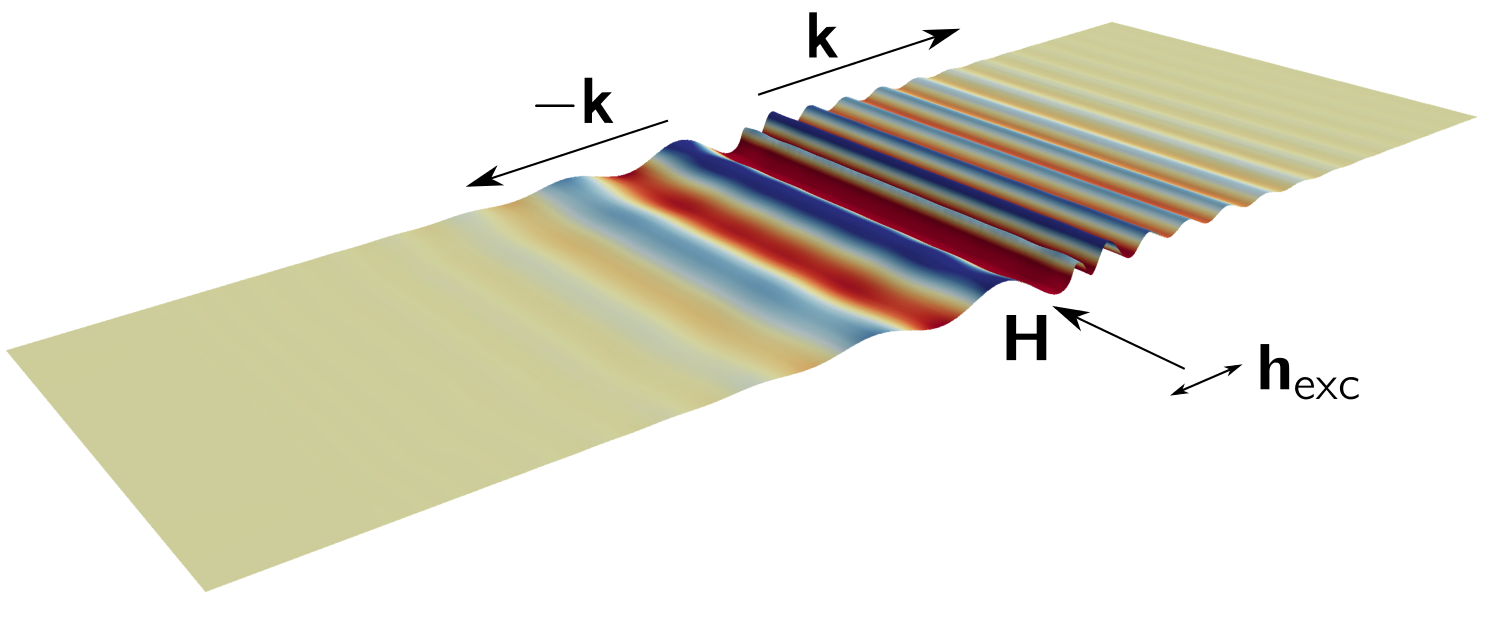

In [2]:
from IPython.display import Image
Image('mayavi/sws/sws.png')

# Imports

In [415]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('lato_style.mplstyle')

import scipy.interpolate
import scipy.optimize

# Theory

Theory from Moon et al. [PHYSICAL REVIEW B **88**, 184404 (2013)] for the spin wave spectrum: 

In [380]:
def Omega_Moon(H0, Ms, A, D, k, d, gamma, p=1):
    mu0 = 4 * np.pi * 1e-7
    J = 2 * A / (mu0 * Ms)
    DM = 2 * D / (mu0 * Ms)
    
    om = np.sqrt((H0 + 0.25 * Ms + J * (k ** 2)) * (H0 + 3 * Ms * 0.25 + J * (k **2))
                 - (1 + 2 * np.exp(2 * abs(k) * d)) * np.exp(-4 * abs(k) * d) * (Ms ** 2) / 16 
                 ) 
    om += p * DM * k
    
    # the mu0 factor shown in the paper is not necessary if we use gamma
    # in Hz / (A / m)
    om = (gamma) * om
    
    return om

# Simulations

We will run the scripts for the simulation of spin waves using both OOMMF and Fidimag:

In [ ]:
!cd ../sims/spin_waves_sims/oommf/dmi && make

In [ ]:
!cd ../sims/spin_waves_sims/fidimag/dmi && make

# Comparison with OOMMF/Fidimag/MuMax3 simulations

Load the data from the OOMMF and Fidimag simulations

In [303]:
base_folder = '../sims/spin_waves_sims/oommf/dmi/'
im_data_OOMMF = np.loadtxt(base_folder + 'spectra_log10.dat')
im_data_f_OOMMF = np.loadtxt(base_folder + 'spectra_log10_freqs.dat')
im_data_k_OOMMF = np.loadtxt(base_folder + 'spectra_log10_ks.dat')

base_folder = '../sims/spin_waves_sims/fidimag/dmi/'
im_data_Fidimag = np.loadtxt(base_folder + 'spectra_log10.dat')
im_data_f_Fidimag = np.loadtxt(base_folder + 'spectra_log10_freqs.dat')
im_data_k_Fidimag = np.loadtxt(base_folder + 'spectra_log10_ks.dat')

base_folder = '../sims/spin_waves_sims/mumax3/dmi/'
im_data_MuMax3 = np.loadtxt(base_folder + 'spectra_log10.dat')
im_data_f_MuMax3 = np.loadtxt(base_folder + 'spectra_log10_freqs.dat')
im_data_k_MuMax3 = np.loadtxt(base_folder + 'spectra_log10_ks.dat')

We will scale the maximum values shown in the spectra:

In [5]:
cbmax_OOMMF = im_data_OOMMF.max() / 1
cbmin_OOMMF = im_data_OOMMF.min() / 9

cbmax_Fidimag = im_data_Fidimag.max() / 1
cbmin_Fidimag = im_data_Fidimag.min() / 9

cbmax_MuMax3 = im_data_MuMax3.max() / 1
cbmin_MuMax3 = im_data_MuMax3.min() / 9

We set the magnetic parameters for the comparison with the theory of Moon et al. Notice that we define $\gamma$ such that the spectrum will be given by the frequency $f=\omega/2\pi$

In [6]:
mu0 = 4 * np.pi * 1e-7
A_si = 13e-12      # J * m**-1
DM_si = 3e-3        # J * m**-2
# Ku_si = 0e6          # J * m**-3
Ms_si = 0.86e6      # A / m
B0_si = 0.4          # T
d = 1e-9             # nm
H0_si = B0_si / mu0  # A /m
#  We will compute f and not omega = 2 PI f
gamma_si = 1e-9 * 2.21e5 / (2 * np.pi)  # GHz / (A / m)

Define the range of wave vector magnitudes and compute the spin wave spectrum

In [7]:
kmax = 0.4 * 1e9
phi_k = 0.5 * np.pi
ks = np.linspace(1e-10, kmax, 500)
ks_n = np.linspace(-kmax, 1e-10, 500)
oms = Omega_Moon(H0_si, Ms_si, A_si, DM_si, ks, d, gamma_si, p=1)
oms_n = Omega_Moon(H0_si, Ms_si, A_si, DM_si, ks_n, d, gamma_si, p=1) 

And finally we plot with respect to the intensity spectrum from the OOMMf simulation

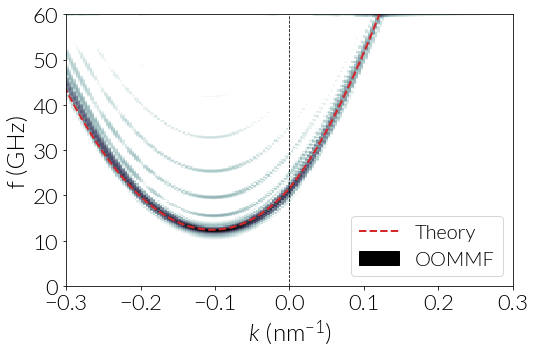

In [30]:
f = plt.figure()
ax= f.add_subplot(111)

ax.imshow(im_data_OOMMF, aspect='auto', vmin=cbmin_OOMMF, vmax=cbmax_OOMMF,
          extent=[im_data_k_OOMMF[0], im_data_k_OOMMF[-1],
                  im_data_f_OOMMF[0], im_data_f_OOMMF[-1]],
          cmap='bone_r')

ax.plot(ks * 1e-9, oms, lw=2, ls='--', color='C3', label='Theory')
ax.plot(ks_n * 1e-9, oms_n, lw=2, ls='--', color='C3')
plt.axvline(x=0, color='k', ls='--', lw=0.8)

ax.set_xlim(-0.3, 0.3)
ax.set_ylim(0, 60)

ax.set_xlabel(r'$k\,\,(\mathrm{nm}^{-1})$')
ax.set_ylabel('f (GHz)')

handles, labels = ax.get_legend_handles_labels()
blacks = matplotlib.patches.Patch(color='k', label='OOMMF')
l = ax.legend(handles=[handles[0], blacks], loc=4)

# plt.savefig('../paper/figures/result_spin-waves-oommf.pdf', bbox_inches='tight')

For the Fidimag simulation:

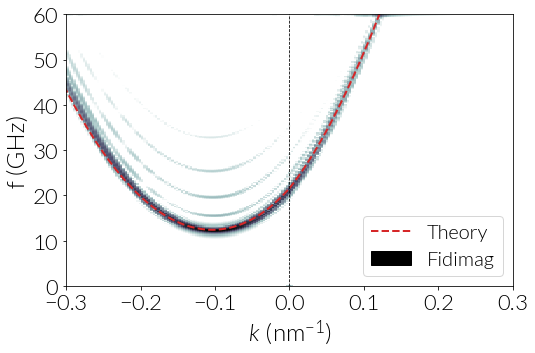

In [8]:
f = plt.figure()
ax= f.add_subplot(111)

ax.imshow(im_data_Fidimag, aspect='auto', vmin=cbmin_Fidimag, vmax=cbmax_Fidimag,
          extent=[im_data_k_Fidimag[0], im_data_k_Fidimag[-1],
                  im_data_f_Fidimag[0], im_data_f_Fidimag[-1]],
          cmap='bone_r')

ax.plot(ks * 1e-9, oms, lw=2, ls='--', color='C3', label='Theory')
ax.plot(ks_n * 1e-9, oms_n, lw=2, ls='--', color='C3')
plt.axvline(x=0, color='k', ls='--', lw=0.8)

ax.set_xlim(-0.3, 0.3)
ax.set_ylim(0, 60)

ax.set_xlabel(r'$k\,\,(\mathrm{nm}^{-1})$')
ax.set_ylabel('f (GHz)')

handles, labels = ax.get_legend_handles_labels()
blacks = matplotlib.patches.Patch(color='k', label='Fidimag')
l = ax.legend(handles=[handles[0], blacks], loc=4)

# plt.savefig('../paper/figures/result_spin-waves-fidimag.pdf', bbox_inches='tight')

And the MuMax3 simulation:

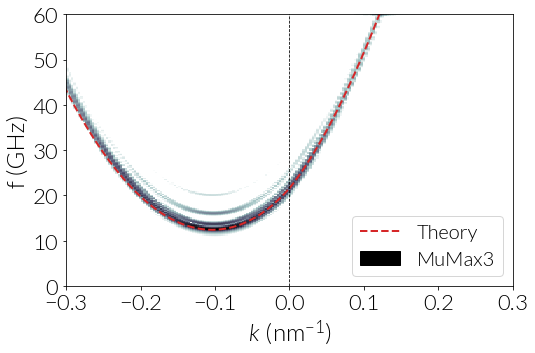

In [35]:
f = plt.figure()
ax= f.add_subplot(111)

ax.imshow(im_data_MuMax3, aspect='auto', vmin=cbmin_MuMax3, vmax=cbmax_MuMax3,
          extent=[im_data_k_MuMax3[0], im_data_k_MuMax3[-1],
                  im_data_f_MuMax3[0], im_data_f_MuMax3[-1]],
          cmap='bone_r')

ax.plot(ks * 1e-9, oms, lw=2, ls='--', color='C3', label='Theory')
ax.plot(ks_n * 1e-9, oms_n, lw=2, ls='--', color='C3')
plt.axvline(x=0, color='k', ls='--', lw=0.8)

ax.set_xlim(-0.3, 0.3)
ax.set_ylim(0, 60)

ax.set_xlabel(r'$k\,\,(\mathrm{nm}^{-1})$')
ax.set_ylabel('f (GHz)')

handles, labels = ax.get_legend_handles_labels()
blacks = matplotlib.patches.Patch(color='k', label='MuMax3')
l = ax.legend(handles=[handles[0], blacks], loc=4)

# plt.savefig('../paper/figures/result_spin-waves-mumax.pdf', bbox_inches='tight')

# Comparison with theory

The minimum of the dispersion relation, predicted by the theory is:

In [474]:
k_theory_min = scipy.optimize.fmin(lambda k: Omega_Moon(H0_si, Ms_si, A_si, DM_si, k * 1e9, d, gamma_si, p=1), 
                                   -0.15, disp=False)[0]
print('Theoretical k_min =', k_theory_min, 'nm^-1')
print('Theoretical f_min =', Omega_Moon(H0_si, Ms_si, A_si, DM_si, k_theory_min * 1e9, d, gamma_si, p=1), 'GHz')

Theoretical k_min = -0.10359375 nm^-1
Theoretical f_min = 12.4097948874 GHz


We can find the minima in the spin wave spectra from the simulations by taking the largest peak for every $k$ value. We restrict the range of frequencies between 0 and 60 GHz 

In [508]:
def compute_peaks(im_data, im_data_f, im_data_k):

    peaks_f = []
    peaks_k = []

    # Filter the frequencies between 0 and 60 GHz
    f_filter = np.logical_and(im_data_f > 0, im_data_f < 60)

    # Invert the data of the spectrum since ImShow already inverts the
    # array order
    data = im_data[-1::-1]
    for i, k in enumerate(im_data_k):

        if k < -0.3 or k > 0.3:
            continue
        else:
            peak_index = np.where(data[:, i][f_filter] == np.max(data[:, i][f_filter]))[0]
            peaks_f.append(im_data_f[f_filter][peak_index][0])
            peaks_k.append(k)

    peaks_k = np.array(peaks_k)
    peaks_f = np.array(peaks_f)
    
    return peaks_k, peaks_f

We start computing the magnitudes for Fidimag

In [509]:
peaks_k_F, peaks_f_F = compute_peaks(im_data_Fidimag, im_data_f_Fidimag, im_data_k_Fidimag)

Since we used a cutoff frequency of 60 GHz in the simulations, values above this threshold are not defined. Below we show the peaks computed with the function we previously defined:

Text(0,0.5,'f (GHz)')

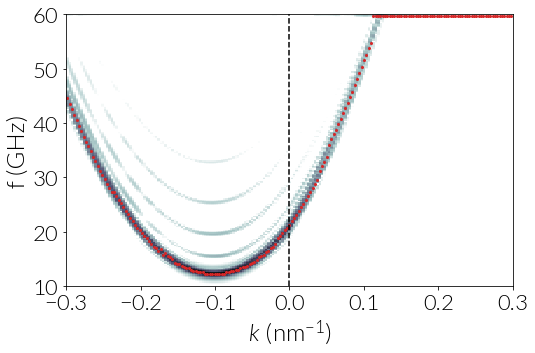

In [510]:
plt.imshow(im_data_Fidimag, aspect='auto', vmin=cbmin_Fidimag, vmax=cbmax_Fidimag,
           extent=[im_data_k_Fidimag[0], im_data_k_Fidimag[-1],
                   im_data_f_Fidimag[0], im_data_f_Fidimag[-1]],
           cmap='bone_r')

plt.plot(peaks_k, peaks_f, 'oC3', ms=2)
plt.axvline(x=0., ls='--', color='k')

plt.xlim(-0.3, 0.3)
plt.ylim(10, 60)

plt.xlabel(r'$k\,\,(\mathrm{nm}^{-1})$')
plt.ylabel('f (GHz)')

From the logarithmic scale, peaks for $k>0$ are not intense enough, thus we will use a 4th order polynomial fit using values up to approximately $k=0$:

In [513]:
print('Computing values up to k =', peaks_k[100], 'nm^-1')
coefs = np.polyfit(peaks_k_F[:100], peaks_f_F[:100], 4)
interp_sim_F = np.poly1d(coefs)

Computing values up to k = 0.0157079632679 nm^-1


Now we can find the minimum in the spin wave spectrum:

In [515]:
k_sim_min_F = scipy.optimize.fmin(interp_sim_F, -0.15, disp=False)[0]
print('Simulation k_min =', k_sim_min_F)

Simulation k_min = -0.1006640625


Here we compare the 4th order polynomial fit to the data with the peaks, with the theoretical curve. We also show the points where the minima lie: 

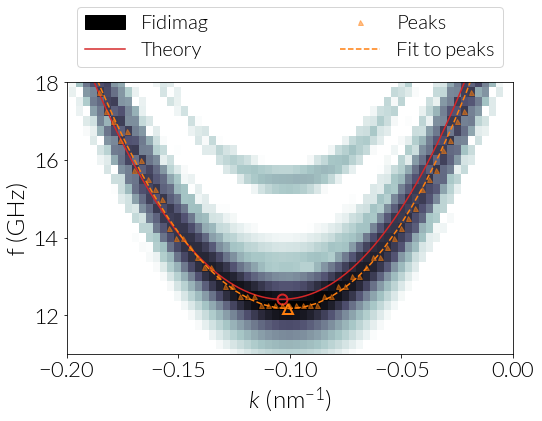

In [574]:
plt.imshow(im_data_Fidimag, aspect='auto', vmin=cbmin_Fidimag, vmax=cbmax_Fidimag,
           extent=[im_data_k_Fidimag[0], im_data_k_Fidimag[-1],
                   im_data_f_Fidimag[0], im_data_f_Fidimag[-1]],
           cmap='bone_r')

# Curve from theory
plt.plot(ks * 1e-9, oms, lw=1.5, ls='-', color='C3', label='Theory')
plt.plot(ks_n * 1e-9, oms_n, lw=1.5, ls='-', color='C3')

# Minimum from theory
plt.plot([k_theory_min], [Omega_Moon(H0_si, Ms_si, A_si, DM_si, k_theory_min * 1e9, d, gamma_si, p=1)], 
         'o', ms=10, markerfacecolor='None', mew=2, color='C3')

# Peaks from simulation
plt.plot(peaks_k, peaks_f, '^C1', ms=5, alpha=0.5, label='Peaks')

# Curve fit to the peaks from simulation
kk = np.linspace(-0.3, 0.3, 100)
plt.plot(kk, interp_sim_F(kk), '--C1', label='Fit to peaks',)
# Minimum from simulation
plt.plot([k_sim_min_F], [interp_sim(k_sim_min_F)], '^C1',
         ms=10, markerfacecolor='None', mew=2)


plt.xlim(-0.2, 0.)
plt.ylim(11, 18)

plt.xlabel(r'$k\,\,(\mathrm{nm}^{-1})$')
plt.ylabel('f (GHz)')

handles, labels = plt.gca().get_legend_handles_labels()
blacks = matplotlib.patches.Patch(color='k', label='Fidimag')
l = plt.legend(handles=[blacks, handles[0], handles[1], handles[2]], ncol=2,
               loc='lower left', bbox_to_anchor=(0, 1.02, 1.0, 1), mode='expand')

plt.savefig('../paper/figures/result_spin-waves_peaks_sim-theory.pdf',
            bbox_inches='tight')

We repeat the same using data from OOMMF and MuMax3:

In [525]:
peaks_k_O, peaks_f_O = compute_peaks(im_data_OOMMF, im_data_f_OOMMF, im_data_k_OOMMF)
peaks_k_M, peaks_f_M = compute_peaks(im_data_MuMax3, im_data_f_MuMax3, im_data_k_MuMax3)

In [526]:
print('Computing values up to k =', peaks_k[100], 'nm^-1')

coefs = np.polyfit(peaks_k_O[:100], peaks_f_O[:100], 4)
interp_sim_O = np.poly1d(coefs)
k_sim_min_O = scipy.optimize.fmin(interp_sim_O, -0.15, disp=False)[0]

coefs = np.polyfit(peaks_k_M[:100], peaks_f_M[:100], 4)
interp_sim_M = np.poly1d(coefs)
k_sim_min_M = scipy.optimize.fmin(interp_sim_M, -0.15, disp=False)[0]

Computing values up to k = 0.0157079632679 nm^-1


In [531]:
print('Fidimag Simulation k_min = {:.6f} nm^-1'.format(k_sim_min_F))
print('OOMMF   Simulation k_min = {:.6f} nm^-1'.format(k_sim_min_O))
print('MuMax3  Simulation k_min = {:.6f} nm^-1'.format(k_sim_min_M))

Fidimag Simulation k_min = -0.100664 nm^-1
OOMMF   Simulation k_min = -0.100137 nm^-1
MuMax3  Simulation k_min = -0.101367 nm^-1


In [532]:
print('Fidimag Simulation f_min = {:6f} GHz'.format(interp_sim_F(k_sim_min_F)))
print('OOMMF   Simulation f_min = {:6f} GHz'.format(interp_sim_O(k_sim_min_O)))
print('MuMax3  Simulation f_min = {:6f} GHz'.format(interp_sim_M(k_sim_min_M)))

Fidimag Simulation f_min = 12.169002 GHz
OOMMF   Simulation f_min = 12.179558 GHz
MuMax3  Simulation f_min = 12.523171 GHz
